한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: 아름동


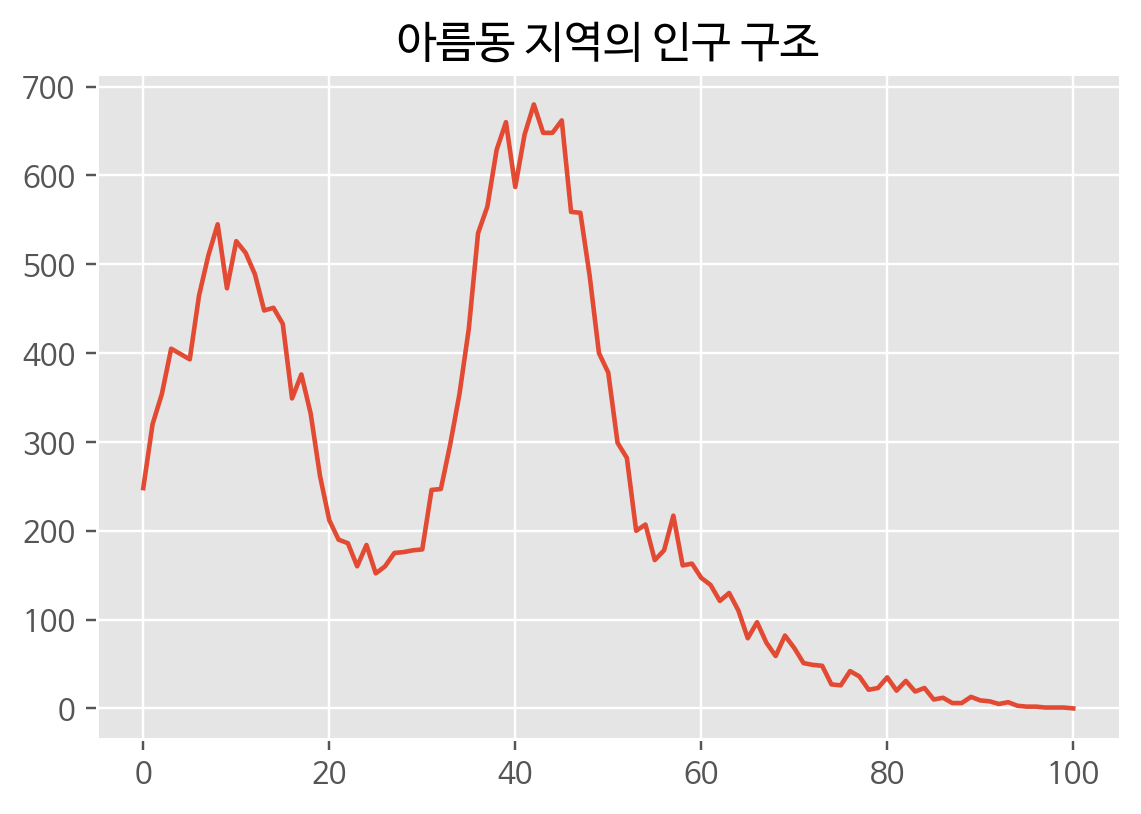

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

# 지역명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ")

for row in data:
  if name in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

#인구구조 시각화
plt.figure(dpi=110) # 그림 크기 설정
plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')

plt.title(name+' 지역의 인구 구조')
plt.plot(result)
plt.show()

막대 그래프 그리기 -> 비교 (지역별, 성별 기준 등)

bar차트가 좀더 정확한 수치를 보는게 좋다.

plot으로 먼저 구조를 보여주고 bar차트로 보여주는게 효과적

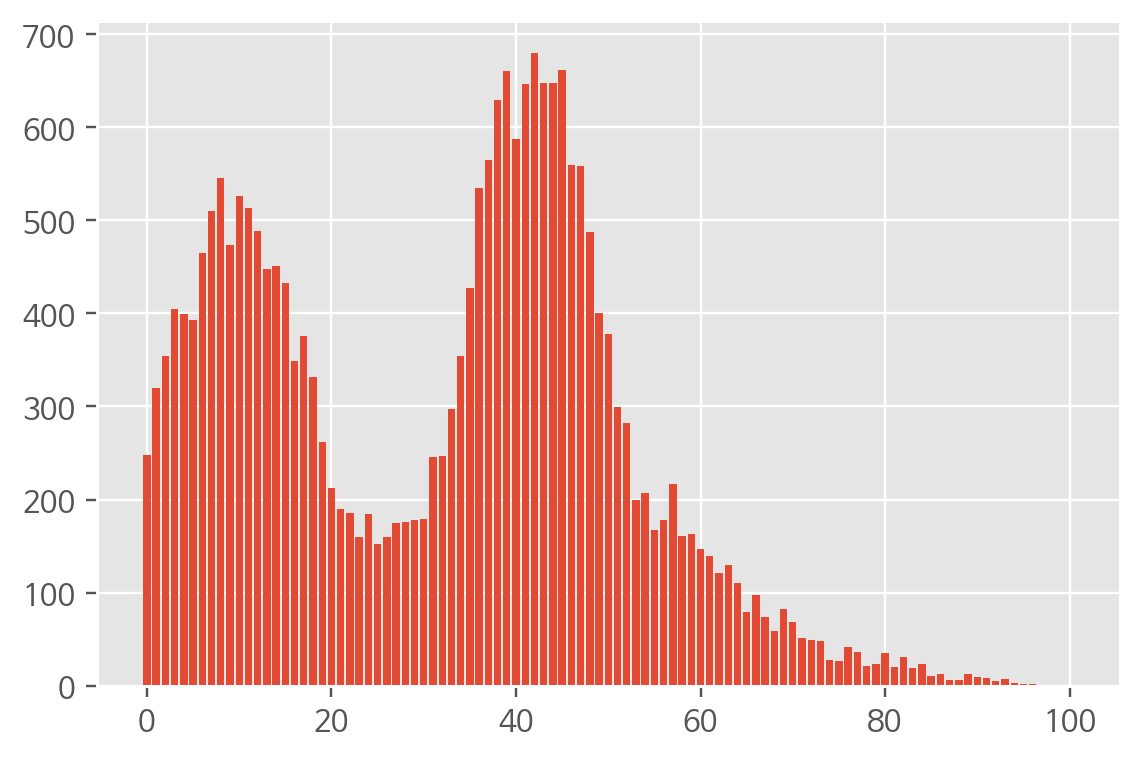

In [ ]:
import csv

f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

for row in data:
  if '아름동' in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

plt.figure(dpi=110) # 그림 크기 설정
plt.bar(range(101),result) # x축이 정의가 안되면 plot차트와 다르게 결과가 나오지 않는다.
plt.show()

수평 막대그래프 (barh() 함수 사용)

barh()는 x축의 데이터를 바로 확인하고 싶을 때 사용

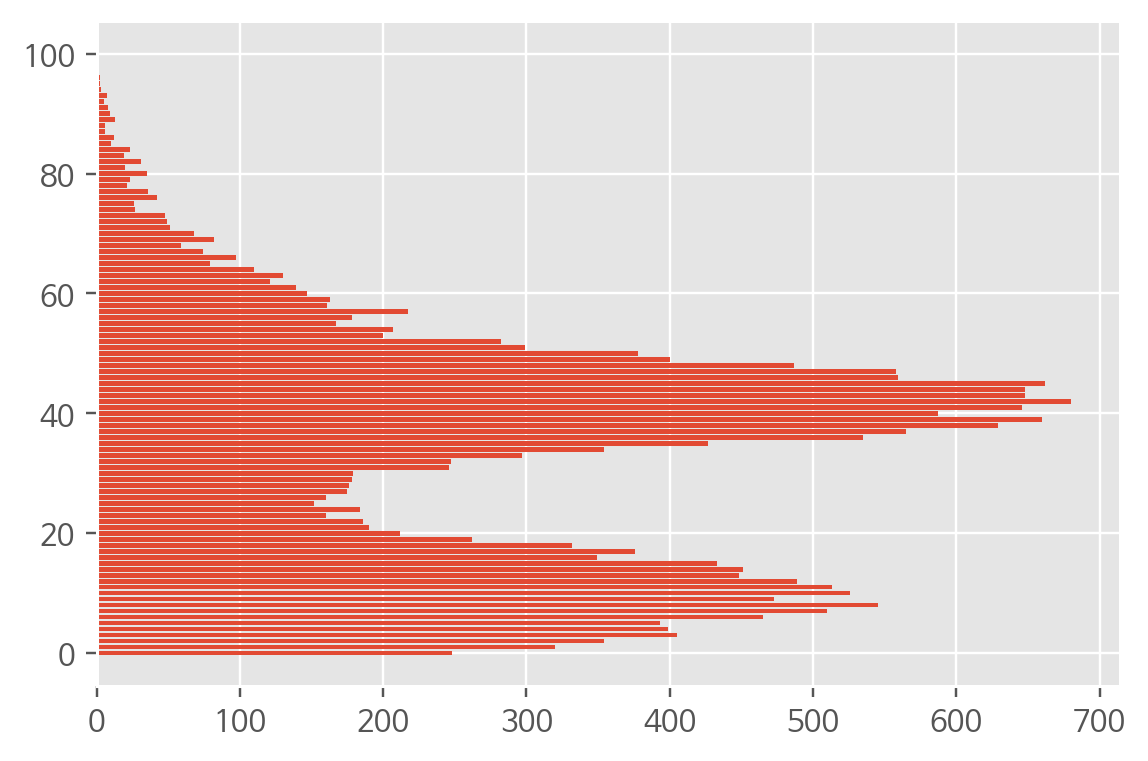

In [ ]:
import csv

f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

for row in data:
  if '아름동' in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

plt.figure(dpi=110) # 그림 크기 설정
plt.barh(range(101),result) # x축이 정의가 안되면 plot차트와 다르게 결과가 나오지 않는다.
plt.show()

우리 동네 bar차트로 확인하기

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: 아름동


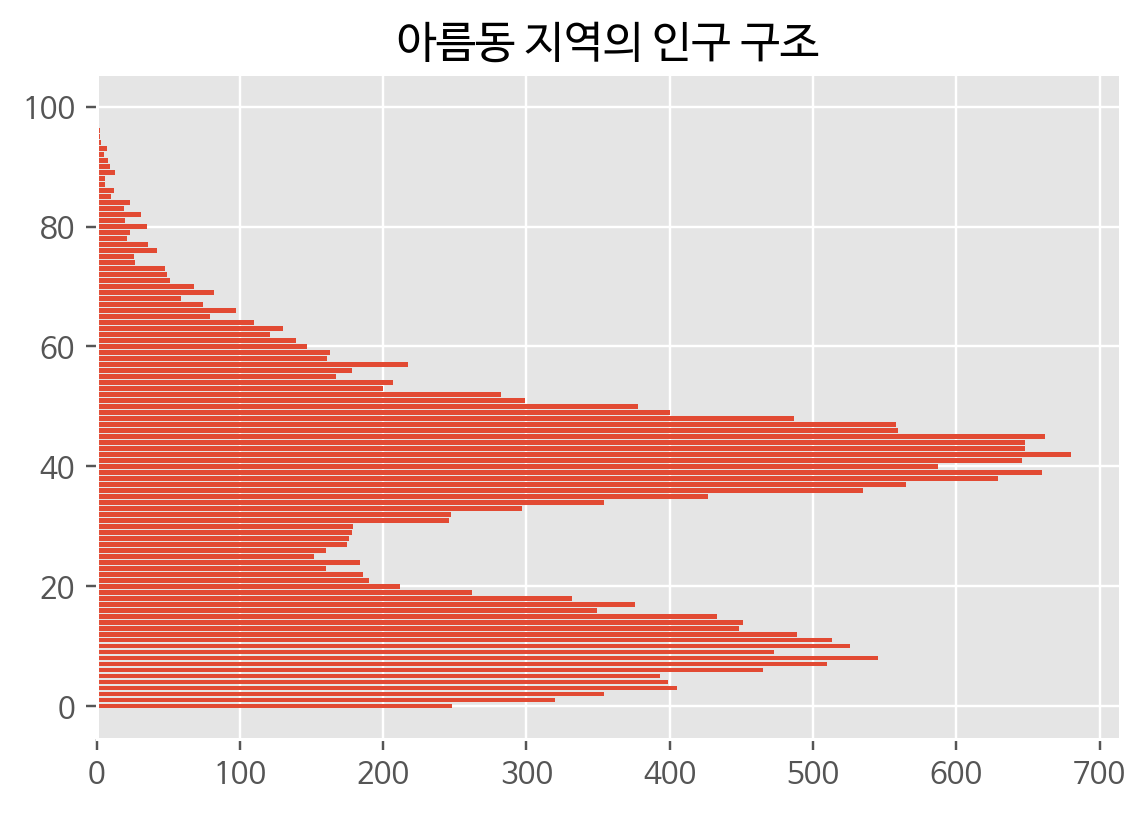

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

# 지역명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ")

for row in data:
  if name in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

#인구구조 시각화
plt.figure(dpi=110) # 그림 크기 설정
plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')

plt.title(name+' 지역의 인구 구조')
plt.barh(range(101),result)
plt.show()

항아리 모양 그래프 그리기

성별 데이터 저장하기 (Type 1)

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []

for row in data:
  if '아름동' in row[0]:
    for i in range(0,101):
      m.append(int(row[i+3]))
      f.append(int(row[-(i+1)])) # -1값부터 담음 -> 100세 이상 부터 값이 담김

f.reverse() # 0세 부터 인구수 나올 수 있도록 데이터 뒤집기

print(m)
print(f)

[165, 185, 221, 209, 192, 209, 189, 210, 217, 197, 210, 198, 198, 189, 171, 156, 183, 178, 205, 175, 203, 218, 210, 257, 222, 249, 203, 239, 227, 212, 250, 237, 270, 309, 308, 387, 366, 367, 349, 390, 324, 330, 342, 306, 363, 348, 331, 321, 302, 275, 264, 253, 258, 266, 280, 224, 280, 257, 277, 246, 270, 217, 194, 248, 180, 193, 177, 130, 148, 159, 154, 141, 112, 77, 86, 70, 86, 69, 57, 47, 51, 44, 26, 32, 20, 9, 19, 13, 5, 6, 3, 3, 3, 2, 1, 3, 1, 1, 1, 0, 1]
[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18, 12, 11, 10, 3, 7, 3, 2, 1, 3, 6]


성별 데이터 순서대로 저장하기 (Type 2)

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []

for row in data:
  if '아름동' in row[0]:
    for i in row[3:104]: # 남성 데이터:3~103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리시트에 저장
      m.append(int(i))
    for i in row[106:]: # 여성 데이터:106번 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리시트에 저장 
      f.append(int(i))

f.reverse() # 0세 부터 인구수 나올 수 있도록 데이터 뒤집기

print(m)
print(f)

데이터 시각화하기

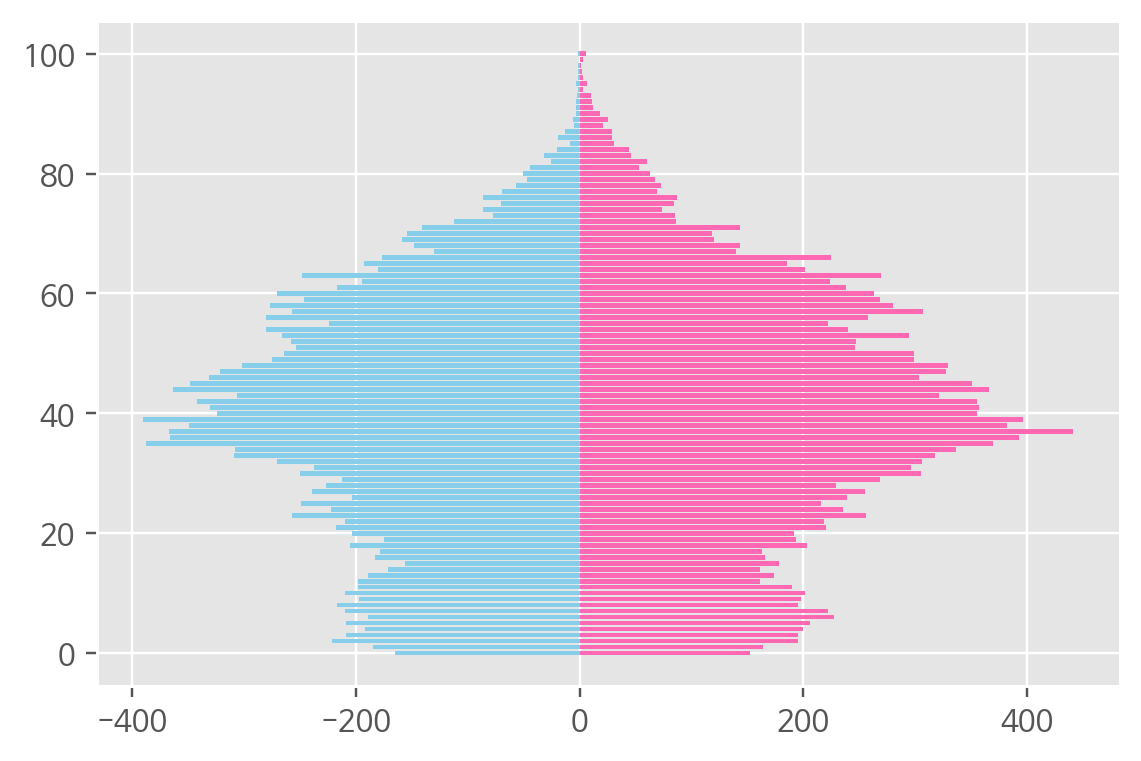

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=110) 
plt.rc('font',family='NanumBarunGothic')

plt.barh(range(101), m, color = 'skyblue',label = '남성')
plt.barh(range(101), f, color = 'hotpink', label = '여성')
plt.show()

항아리 그래프를 위해 남성 데이터 음수로 바꾸기

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []

for row in data:
  if '신도림' in row[0]:
    for i in row[3:104]: # 남성 데이터:3~103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리시트에 저장
      m.append(-int(i))
    for i in row[106:]: # 여성 데이터:106번 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리시트에 저장 
      f.append(int(i))

print(m)
print(f)

[-165, -185, -221, -209, -192, -209, -189, -210, -217, -197, -210, -198, -198, -189, -171, -156, -183, -178, -205, -175, -203, -218, -210, -257, -222, -249, -203, -239, -227, -212, -250, -237, -270, -309, -308, -387, -366, -367, -349, -390, -324, -330, -342, -306, -363, -348, -331, -321, -302, -275, -264, -253, -258, -266, -280, -224, -280, -257, -277, -246, -270, -217, -194, -248, -180, -193, -177, -130, -148, -159, -154, -141, -112, -77, -86, -70, -86, -69, -57, -47, -51, -44, -26, -32, -20, -9, -19, -13, -5, -6, -3, -3, -3, -2, -1, -3, -1, -1, -1, 0, -1]
[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18,

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


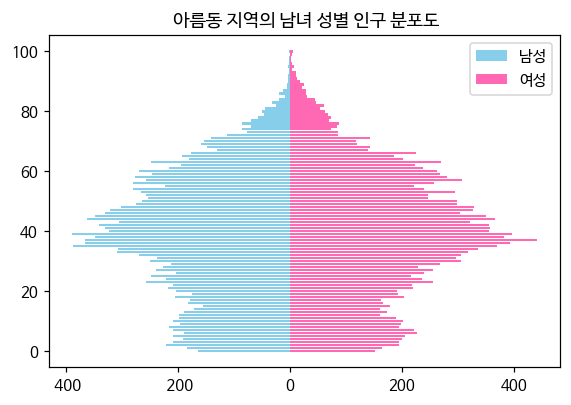

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=110) 
plt.rc('font',family='NanumBarunGothic')
#plt.rcParams['axes.unicode_minus'] = False

plt.barh(range(101), m, color = 'skyblue',label = '남성')
plt.barh(range(101), f, color = 'hotpink', label = '여성')
plt.title(' 아름동 지역의 남녀 성별 인구 분포도')
plt.legend()
plt.show()

1) 인구 구조 데이터를 활용해서, 수평 막대 그래프 인구 구조 시각화

2) 성별 데이터 수평 막대 그래프로 시각화 (항아리 그래프) -> 본인 동네에 데이터

3) 2019년 2월 연령별 인구 구조 -> 2020년 2월 연령별 인구 구조 비교 (같이 그리기)